In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Agent:
    def __init__(self, bandits, iters):
        self.iters = iters
        self.bandits = bandits
        self.tallies = np.zeros((3,iters))
        
    def train(self):
        for i in range(iters):
            for b in range(len(bandits)):
                choice, reward = next(self.bandits[b])
                average_reward = self.bandits[b].acc_reward/(i+1)
                self.tallies[b][i] = average_reward

In [3]:
class Bandit:
    def __init__(self, n, e, arms=None):
        self.n = n
        self.e = e
        
        self.arms = arms if type(arms) != None else np.random.normal(0, 1, n)
        self.knowledge = np.full(n, 1)
        
        self.acc_reward = 0
        
        
    def __next__(self):
        is_random = np.random.choice(2, 1, p=[1-self.e, self.e])
        if is_random:
            choice = np.random.randint(0,self.n)
            self.knowledge[choice] = self.arms[choice]
        else:                             
            choice = np.argmax(self.knowledge)
            self.knowledge[choice] = self.arms[choice]
            
        self.acc_reward += self.arms[choice]
        return choice, self.arms[choice]

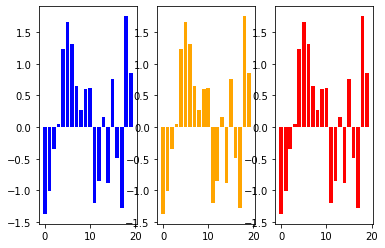

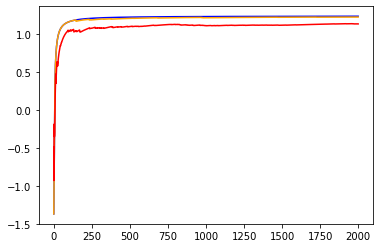

In [4]:
#%matplotlib notebook

total_reward = 0
iters = 2000
num_arms = 20


arms = np.random.normal(0, 1, num_arms)
bandit1 = Bandit(num_arms, 0.001, arms)
bandit2 = Bandit(num_arms, 0.01, arms)
bandit3 = Bandit(num_arms, 0.1, arms)

figure, axis = plt.subplots(1, 3)
axis[0].bar(range(bandit1.n),bandit1.arms, color="blue")
axis[1].bar(range(bandit2.n),bandit2.arms, color="orange")
axis[2].bar(range(bandit3.n),bandit3.arms, color="red")
plt.show()


bandits = [bandit1, bandit2, bandit3]
agent = Agent(bandits, iters)
agent.train()

#plt.ylim(0,max(tallies[2]))
plt.plot(agent.tallies[0], color = "blue")
plt.plot(agent.tallies[1], color = "orange")
plt.plot(agent.tallies[2], color = "red")
plt.show()
